### 1. Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### 2. Load Data Set

In [2]:
data_set = pd.read_csv("../input/iris/Iris.csv")

### 3. Preview Data and Fill Missing Values

In [3]:
# Rename column names
data_set.rename(columns={"SepalLengthCm":"SepalLength", 
                         "SepalWidthCm": "SepalWidth", 
                         "PetalLengthCm": "PetalLength", 
                         "PetalWidthCm": "PetalWidth"}, inplace=True)

In [4]:
data_set.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_set.shape

(150, 6)

In [6]:
data_set.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id             150 non-null int64
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 4. Data Visualization

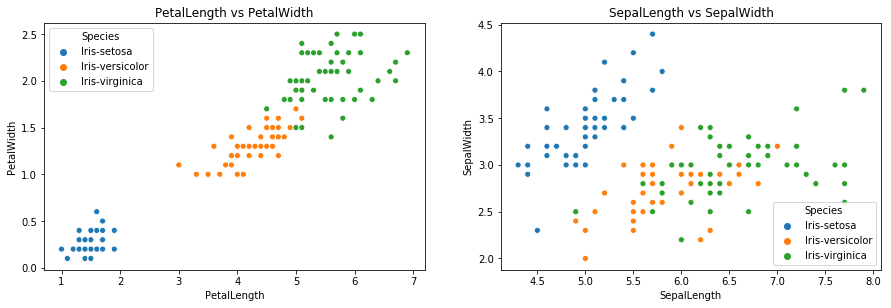

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='PetalLength', y='PetalWidth', hue="Species", data=data_set)
plt.title("PetalLength vs PetalWidth")
plt.subplot(2,2,2)
sns.scatterplot(x='SepalLength', y='SepalWidth', hue="Species", data=data_set)
plt.title("SepalLength vs SepalWidth")
plt.show()

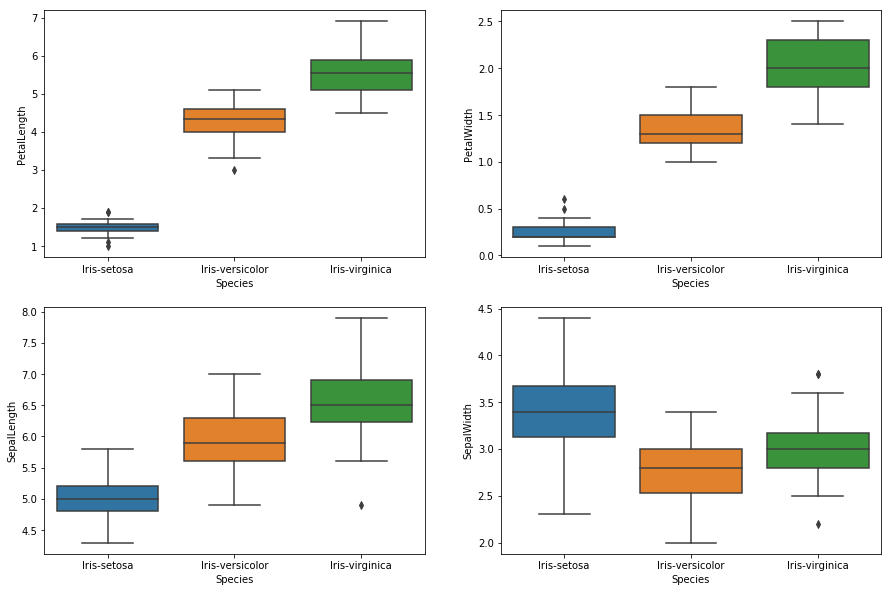

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='PetalLength', data=data_set)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y='PetalWidth', data=data_set)
plt.subplot(2,2,3)
sns.boxplot(x='Species', y='SepalLength', data=data_set)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y='SepalWidth', data=data_set)
plt.show()

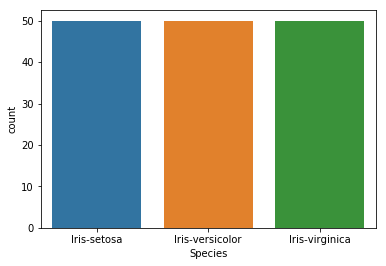

In [10]:
sns.countplot(x="Species", data=data_set)
plt.show()

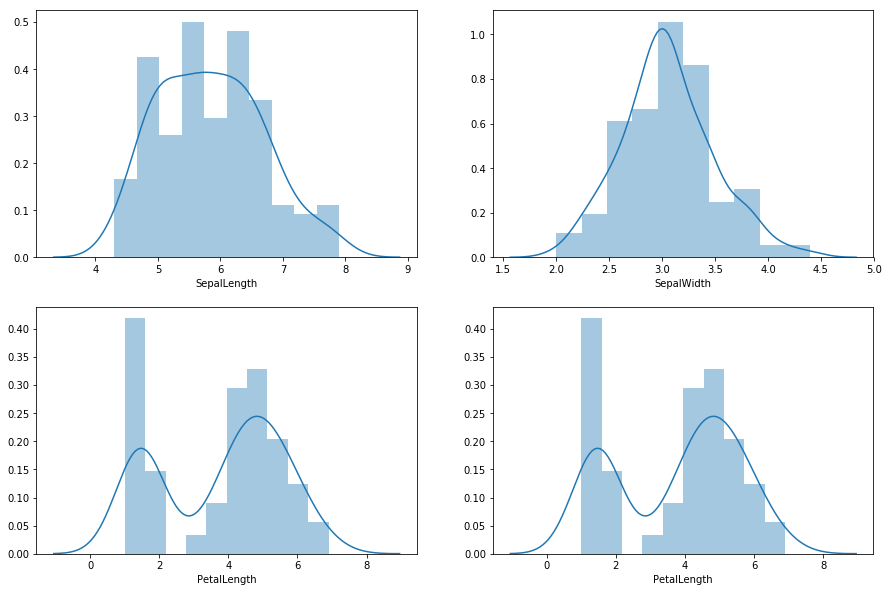

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data_set["SepalLength"],  kde=True, bins=10, label="SepalLength")
plt.subplot(2,2,2)
sns.distplot(data_set["SepalWidth"],  kde=True, bins=10, label="SepalWidth")
plt.subplot(2,2,3)
sns.distplot(data_set["PetalLength"],  kde=True, bins=10, label="PetalLength")
plt.subplot(2,2,4)
sns.distplot(data_set["PetalLength"],  kde=True, bins=10, label="PetalLength")
plt.show()

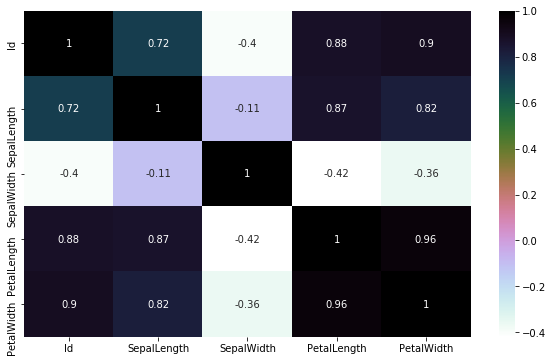

In [12]:
plt.figure(figsize=(10,6)) 
sns.heatmap(data_set.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### 5. Model Building

In [13]:
# Remove unwanted column "Id"
data_set.drop("Id", axis=1, inplace=True)
# Get the unique Species
data_set["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# Convert Categorical into Numeric
data_set["Species"] = data_set["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [15]:
# Consider all attributes for modelling
X = data_set.drop(["Species"], axis=1)
Y = data_set.loc[:, "Species"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (120, 4)
x_test shape:  (30, 4)
y_train shape:  (120,)
y_test shape:  (30,)


#### 5.1 Logistic Regression

In [17]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=300)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lr_pred = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

In [19]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.78      0.82         9
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



#### 5.2 KNN 

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [22]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### 5.3 Randon Forest Classifier

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [25]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.78      0.82         9
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



#### 5.4 Decision Tree Classifier

In [26]:
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [28]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.78      0.82         9
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



#### 5.5 Support Vector Machine

In [29]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [31]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.78      0.82         9
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [32]:
print("SVM Accuracy: ",svm_accuracy)
print("KNN Accuracy: ", knn_accuracy)
print("Decision Tree Accuracy: ", dt_accuracy)
print("Random Forest Accuracy: ", rf_accuracy)
print("Logistic Regression Accuracy: ", lr_accuracy)

SVM Accuracy:  0.9
KNN Accuracy:  0.9333333333333333
Decision Tree Accuracy:  0.9
Random Forest Accuracy:  0.9
Logistic Regression Accuracy:  0.9


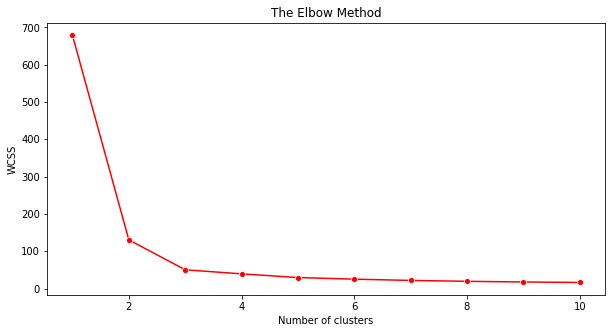

In [33]:
X = data_set.iloc[:, [1, 2, 3, 4]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_model.fit_predict(X)

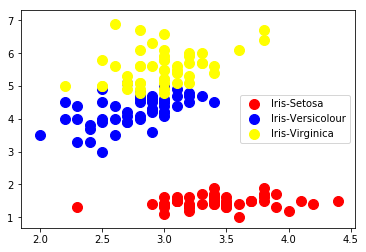

In [35]:
#Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

plt.legend()

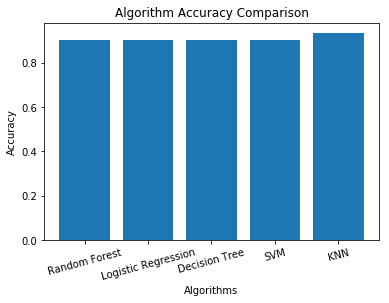

In [36]:
x = ["Random Forest", "Logistic Regression", "Decision Tree", "SVM", "KNN"]
y = [rf_accuracy, lr_accuracy, dt_accuracy, svm_accuracy, knn_accuracy]
plt.bar(x=x, height=y)
plt.title("Algorithm Accuracy Comparison")
plt.xticks(rotation=15)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()